## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

a. Describe of the source of the data, including all necessary links to data sources, where possible. 

b. Inspect the contents of each data set.

c. If necessary, convert data types of columns of the data frames to the correct types.

d. Remove unnecessary parts of the data sets (e.g. duplicate entries, dates beyond the desired range, etc).

e. Identify missing values in the data sets. Impute or remove NaN values, as appropriate.

f. Join the Seattle and St. Louis data frames, keeping only the date and precipitation values.

g. Ensure that the data frame is in a tidy, or long, format.

h. Rename the columns, if necessary, to follow best practices of being lowercase, snake_case, and understandable.

i. Create any derived variables that will be useful in the analysis.

j. Export the clean data set as a csv file and upload the csv file to your Github repository for the project.

## Load the data

Our data comes from The [NOAA](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND) National Centers for Environmental Information.
 <br>
They provide records of daily precipitation, and we used records of daily precipitation from both Seattle and St. Louis from the years 2018-2022
<br>
These records, called seattle_rain.csv and stl_rain.csv, can be found in a [github repository](https://github.com/hopecrosier/Seattle-Weather/tree/main/Weather) 

We will load the two data sets into two seperate data frames, df_seattle and df_stlouis

In [2]:
df_seattle = pd.read_csv('https://github.com/hopecrosier/Seattle-Weather/raw/main/Weather/seattle_rain.csv')

In [3]:
df_stlouis = pd.read_csv('https://github.com/hopecrosier/Seattle-Weather/raw/main/Weather/stl_rain.csv')

## Explore the contents of the data sets

We want to look at the data within these dataframes and get a sense of what kind of variables and observations are held within

In [4]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54574 entries, 0 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  54574 non-null  object 
 1   NAME     54574 non-null  object 
 2   DATE     54574 non-null  object 
 3   DAPR     1166 non-null   float64
 4   MDPR     1163 non-null   float64
 5   PRCP     53143 non-null  float64
 6   SNOW     33167 non-null  float64
 7   SNWD     12835 non-null  float64
dtypes: float64(5), object(3)
memory usage: 3.3+ MB


In [5]:
df_stlouis.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD'], dtype='object')

In [6]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


In [7]:
df_seattle.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
       'WESD', 'WESF'],
      dtype='object')

After looking into what observations these dataframes have, it looks like we will be most interested in the NAME, DATE and PRCP fields since we want to know how much it rained (PRCP) on what day (DATE) and where this was recorded (NAME)

## Are the data suitable for answering the question?

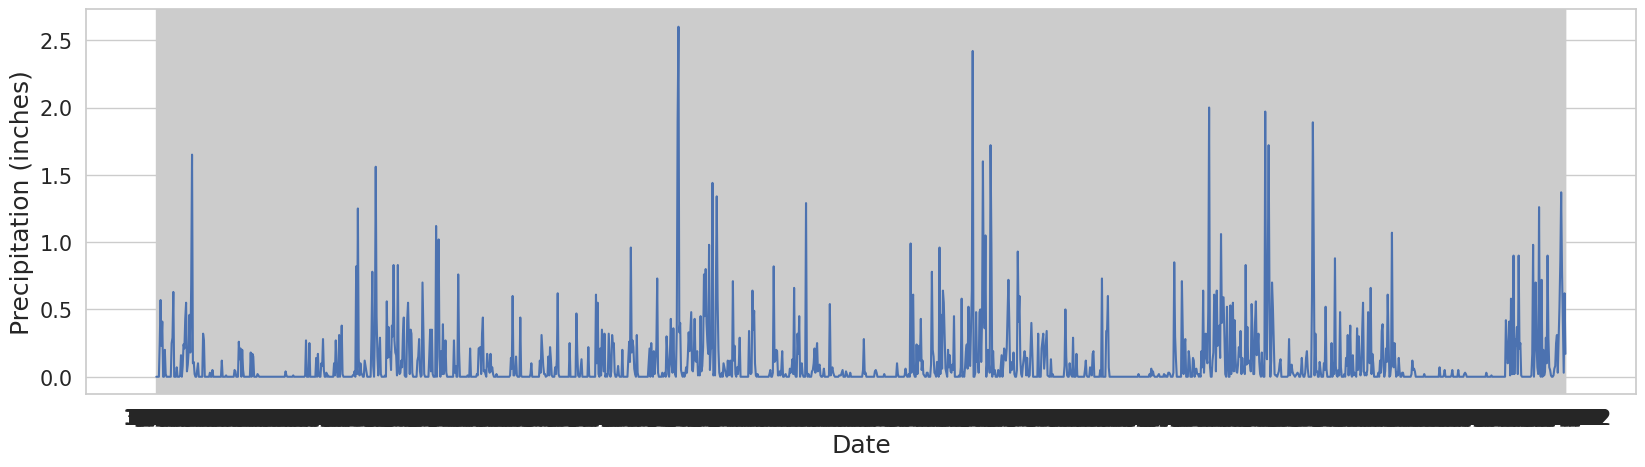

In [8]:
plt.figure(figsize=(20,5))
sns.lineplot(data = df_seattle, x = 'DATE', y = 'PRCP')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Precipitation (inches)', fontsize = 18)
plt.tick_params(labelsize = 15);

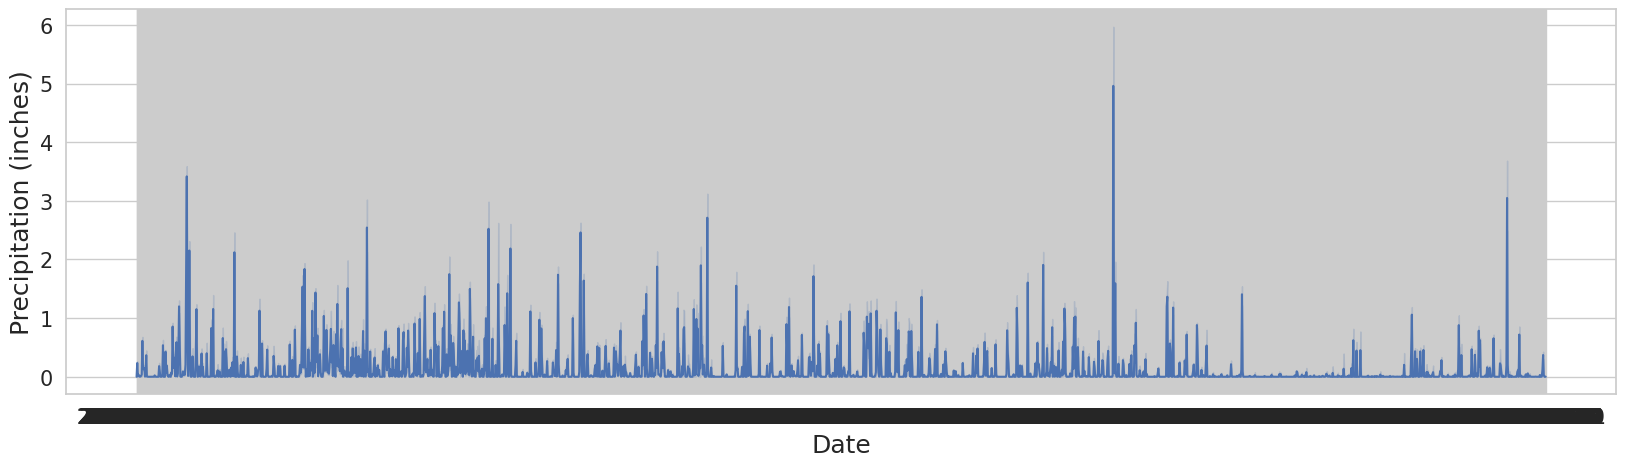

In [9]:
plt.figure(figsize=(20,5))
sns.lineplot(data = df_stlouis, x = 'DATE', y = 'PRCP')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Precipitation (inches)', fontsize = 18)
plt.tick_params(labelsize = 15);

We can see that there are plenty of precipitation observations in both data frames, which leads us to believe that yes this data is suitable for answering the question.

## Convert data types, if necessary

It looks like the DATE column values are recorded as objects, and not datetime variables, so we want to go ahead and convert both data frames values from objects to datetimes

In [10]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

In [11]:
df_stlouis['DATE'] = pd.to_datetime(df_stlouis['DATE'])

In [12]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1658 non-null   object        
 1   NAME     1658 non-null   object        
 2   DATE     1658 non-null   datetime64[ns]
 3   DAPR     23 non-null     float64       
 4   MDPR     23 non-null     float64       
 5   PRCP     1636 non-null   float64       
 6   SNOW     353 non-null    float64       
 7   SNWD     66 non-null     float64       
 8   WESD     15 non-null     float64       
 9   WESF     28 non-null     float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 129.7+ KB


In [13]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54574 entries, 0 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  54574 non-null  object        
 1   NAME     54574 non-null  object        
 2   DATE     54574 non-null  datetime64[ns]
 3   DAPR     1166 non-null   float64       
 4   MDPR     1163 non-null   float64       
 5   PRCP     53143 non-null  float64       
 6   SNOW     33167 non-null  float64       
 7   SNWD     12835 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 3.3+ MB


Now we can see that all the DATE observations in both data sets are datetime values

## Identify and deal with missing values

In [14]:
df_stlouis

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...
54569,US1MOSL0084,"DES PERES 0.7 SSW, MO US",2022-12-08,NaN,NaN,0.00,NaN,NaN
54570,US1MOSL0084,"DES PERES 0.7 SSW, MO US",2022-12-13,NaN,NaN,0.00,0.0,NaN
54571,US1MOSL0084,"DES PERES 0.7 SSW, MO US",2022-12-14,NaN,NaN,0.89,NaN,NaN
54572,US1MOSL0084,"DES PERES 0.7 SSW, MO US",2022-12-15,NaN,NaN,0.36,NaN,NaN


In [15]:
df_seattle

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-04,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,NaN,NaN,0.25,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1653,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-27,NaN,NaN,0.78,NaN,NaN,NaN,NaN
1654,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-28,NaN,NaN,0.40,NaN,NaN,NaN,NaN
1655,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-29,NaN,NaN,0.03,NaN,NaN,NaN,NaN
1656,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-30,NaN,NaN,0.62,NaN,NaN,NaN,NaN


Here we can see that while the St. Louis data starts in 2017, the Seattle data doesn't start until 2018. We want to remove the 2017 data from the St. Louis dataframe so we are looking at comparable date. They both go into 2022 so we only need to scale the St. Louis data from one side.

In [16]:
df_stlouis = df_stlouis.loc[df_stlouis['DATE'] >= '2018-01-01']
df_stlouis

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
241,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-05,NaN,NaN,0.00,0.2,1.0
242,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-08,NaN,NaN,0.24,NaN,NaN
243,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-10,NaN,NaN,0.00,NaN,NaN
244,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-11,NaN,NaN,0.02,NaN,NaN
245,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-15,NaN,NaN,0.05,0.5,NaN
...,...,...,...,...,...,...,...,...
54569,US1MOSL0084,"DES PERES 0.7 SSW, MO US",2022-12-08,NaN,NaN,0.00,NaN,NaN
54570,US1MOSL0084,"DES PERES 0.7 SSW, MO US",2022-12-13,NaN,NaN,0.00,0.0,NaN
54571,US1MOSL0084,"DES PERES 0.7 SSW, MO US",2022-12-14,NaN,NaN,0.89,NaN,NaN
54572,US1MOSL0084,"DES PERES 0.7 SSW, MO US",2022-12-15,NaN,NaN,0.36,NaN,NaN


Now the two data sets both contain data from 2018-2022

In [17]:
df_stlouis['NAME'].unique()

array(['ST. CHARLES 2.3 NE, MO US', 'MANCHESTER 1.4 SE, MO US',
       'FLORISSANT 1.3 E, MO US', 'MAC KENZIE 0.3 ESE, MO US',
       'BELLEVILLE 4.5 WNW, IL US', 'WEBSTER GROVES 1.6 NNE, MO US',
       'ARNOLD 0.5 E, MO US', 'MAPLEWOOD 1.3 SE CLOSED, MO US',
       'GLENDALE 0.4 S, MO US', 'MARYLAND HEIGHTS 1.2 ESE, MO US',
       'FLORISSANT 2.5 NE, MO US', 'KIRKWOOD 1.0 NNW, MO US',
       'GRANITE CITY 2.7 NE, IL US', 'OAKVILLE 2.5 NW, MO US',
       'GLENDALE 0.3 NE, MO US', 'ST. LOUIS 5.7 SW, MO US',
       'EDMUNDSON 0.7 NNW, MO US', 'BALLWIN 0.5 NNW, MO US',
       'BALLWIN 1.6 E, MO US', 'KIRKWOOD 1.6 S, MO US',
       'ST CHARLES ELM POINT, MO US', 'ST LOUIS SCIENCE CENTER, MO US',
       'ST CHARLES 7 SSW, MO US', 'FAIRMONT CITY 0.9 ENE, IL US',
       'CAHOKIA ST LOUIS DOWNTOWN AIRPORT, IL US',
       'GLENDALE 0.6 WSW, MO US', 'COLUMBIA 0.4 S, IL US',
       'CLAYTON 1.2 NW, MO US', 'FENTON 4.1 S, MO US',
       'ST. CHARLES 2.6 S, MO US', 'GRANITE CITY 1.4 ENE, IL US',
  

In [18]:
df_seattle['NAME'].unique()

array(['SEATTLE 2.1 ESE, WA US'], dtype=object)

Here we can see that while the St. Louis df has many stations, the Seattle df has only one. So we want to scale back the St. Louis df again so that we are only looking at one station there as well. We have chosen to look at the station that is located at the airport.

In [19]:
df_stlouis = df_stlouis.loc[df_stlouis['NAME'] == 'ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US']
df_stlouis

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
51540,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-01,NaN,NaN,0.00,0.0,0.0
51541,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-02,NaN,NaN,0.00,0.0,0.0
51542,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-03,NaN,NaN,0.00,0.0,0.0
51543,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-04,NaN,NaN,0.00,0.2,0.0
51544,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-05,NaN,NaN,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...
53361,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2022-12-27,NaN,NaN,0.00,0.0,1.0
53362,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2022-12-28,NaN,NaN,0.00,0.0,1.0
53363,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2022-12-29,NaN,NaN,0.00,0.0,0.0
53364,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2022-12-30,NaN,NaN,0.31,0.0,0.0


Now both dataframes contain data from one station and one station only, with matching observation time frames of 2018-2022

##e. Identify missing values in the data sets. Impute or remove NaN values, as appropriate.

In [20]:
df_stlouis.isna().sum()

STATION       0
NAME          0
DATE          0
DAPR       1826
MDPR       1826
PRCP          0
SNOW          0
SNWD          0
dtype: int64

We can see that there are 0 NaN 'DATE' or 'PRCP' observations for the St. Louis df

In [21]:
df_seattle.isna().sum()

STATION       0
NAME          0
DATE          0
DAPR       1635
MDPR       1635
PRCP         22
SNOW       1305
SNWD       1592
WESD       1643
WESF       1630
dtype: int64

And here we see that there are 0 NaN 'DATE' observations but 22 NaN 'PRCP' observations for the Seattle df

How many data points should we have from 2018 to 2022? <br>
5 X 365 + 1 = 1826 
<br> (+1 to account for the one leap year that occurred)

In [22]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 51540 to 53365
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1826 non-null   object        
 1   NAME     1826 non-null   object        
 2   DATE     1826 non-null   datetime64[ns]
 3   DAPR     0 non-null      float64       
 4   MDPR     0 non-null      float64       
 5   PRCP     1826 non-null   float64       
 6   SNOW     1826 non-null   float64       
 7   SNWD     1826 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 128.4+ KB


The St. Louis df has the correct 1826 observations within the five year span

In [23]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1658 non-null   object        
 1   NAME     1658 non-null   object        
 2   DATE     1658 non-null   datetime64[ns]
 3   DAPR     23 non-null     float64       
 4   MDPR     23 non-null     float64       
 5   PRCP     1636 non-null   float64       
 6   SNOW     353 non-null    float64       
 7   SNWD     66 non-null     float64       
 8   WESD     15 non-null     float64       
 9   WESF     28 non-null     float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 129.7+ KB


The Seattle df falls short of the 1826 observations, with only 1658.

We want to fill in the missing values and plan to do so by creating an average of the amount of precipitation from that same day throughout the other 4 years.

## Join data frames keeping `DATE` and `PRCP` columns

The St. Louis df has more observations so we want to make sure that every observation stays, and we add all the observations from the Seattle df that match up with existing St. Louis observations. We perform a left join to achieve this.

In [24]:
df = df_stlouis[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='left')
df.head()

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.0,0.00
1,2018-01-02,0.0,0.00
2,2018-01-03,0.0,0.00
3,2018-01-04,0.0,0.00
4,2018-01-05,0.0,0.25


The melt function will allow us to specifiy which city the observation came from

In [25]:
df.tidy = pd.melt(df, id_vars = 'DATE', var_name = 'CITY', value_name = 'PRCP')
df.tidy.head()

<ipython-input-25-90c99e4858ee>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.tidy = pd.melt(df, id_vars = 'DATE', var_name = 'CITY', value_name = 'PRCP')


,DATE,CITY,PRCP
0,2018-01-01,PRCP_x,0.0
1,2018-01-02,PRCP_x,0.0
2,2018-01-03,PRCP_x,0.0
3,2018-01-04,PRCP_x,0.0
4,2018-01-05,PRCP_x,0.0


We want to rename the x and y precipitation values so that they read as the two different cities.

In [26]:
df.tidy.loc[df.tidy['CITY'] == 'PRCP_x', 'CITY'] = 'STL'
df.tidy.loc[df.tidy['CITY'] == 'PRCP_y', 'CITY'] = 'SEA'
df.tidy

,DATE,CITY,PRCP
0,2018-01-01,STL,0.00
1,2018-01-02,STL,0.00
2,2018-01-03,STL,0.00
3,2018-01-04,STL,0.00
4,2018-01-05,STL,0.00
...,...,...,...
3647,2022-12-27,SEA,0.78
3648,2022-12-28,SEA,0.40
3649,2022-12-29,SEA,0.03
3650,2022-12-30,SEA,0.62


### Rename columns or values to follow best practices

We want to rename the column titles so that they all follow the same format.

In [27]:
df.tidy = df.tidy.rename(columns = {'DATE': 'date', 'CITY': 'city', 'PRCP': 'precipitation'})
df = df.tidy
df

,date,city,precipitation
0,2018-01-01,STL,0.00
1,2018-01-02,STL,0.00
2,2018-01-03,STL,0.00
3,2018-01-04,STL,0.00
4,2018-01-05,STL,0.00
...,...,...,...
3647,2022-12-27,SEA,0.78
3648,2022-12-28,SEA,0.40
3649,2022-12-29,SEA,0.03
3650,2022-12-30,SEA,0.62


# Impute Missing Values

We want to find a way to impute the missing values from the Seattle observations so we have no more NaN observations.

In [28]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year
df

,date,city,precipitation,day_of_year
0,2018-01-01,STL,0.00,1
1,2018-01-02,STL,0.00,2
2,2018-01-03,STL,0.00,3
3,2018-01-04,STL,0.00,4
4,2018-01-05,STL,0.00,5
...,...,...,...,...
3647,2022-12-27,SEA,0.78,361
3648,2022-12-28,SEA,0.40,362
3649,2022-12-29,SEA,0.03,363
3650,2022-12-30,SEA,0.62,364


We create a new data column titled day_of_year so that we can replace the missing values with an average of the percipitation from the remaining years that have actual observations on that same day

In [29]:
indices = np.where(df['precipitation'].isna() == True)[0]
indices

array([1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844,
       1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855,
       1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866,
       1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877,
       1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888,
       1889, 1890, 1891, 1892, 1893, 1894, 1895, 2090, 2131, 2132, 2133,
       2134, 2135, 2136, 2137, 2138, 2139, 2140, 2195, 2196, 2197, 2214,
       2215, 2244, 2245, 2246, 2247, 2248, 2249, 2286, 2287, 2288, 2362,
       2363, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377,
       2417, 2418, 2419, 2420, 2421, 2422, 2423, 2517, 2518, 2519, 2520,
       2521, 2522, 2523, 2524, 2559, 2560, 2561, 2602, 2603, 2604, 2605,
       2606, 2607, 2608, 2609, 2610, 2611, 2612, 2818, 2819, 2820, 2821,
       2822, 2823, 2824, 2825, 2826, 2827, 2972, 2973, 2974, 2975, 2983,
       2984, 2986, 2987, 2988, 3000, 3001, 3004, 30

This array gives us all the indicies of the df where there are NaNs recorded for the precipitation column

In [30]:
mean_day_precipitation = df.loc[df['city'] == 'SEA', ['precipitation', 'day_of_year']].groupby('day_of_year').mean()
mean_day_precipitation

,precipitation
day_of_year,
1,0.052000
2,0.150000
3,0.836000
4,0.370000
5,0.246667
...,...
362,0.120000
363,0.102000
364,0.268000


Now we have a df that contains the mean precipitation for each day of the year for all Seattle observations.

In [31]:
for _, index in enumerate(indices):
    df.loc[index, 'precipitation'] = mean_day_precipitation.loc[df.loc[index,'day_of_year']].values[0]

Now we've replaced all NaN observations with the mean precipitation from the other years and can see that there are no more null/NaN observations in our df

In [32]:
np.where(df['precipitation'].isna() == True)[0]

array([], dtype=int64)

##Create any derived variables that will be useful in the analysis.

In [33]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [34]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [35]:
df

,date,city,precipitation,day_of_year,month,year
0,2018-01-01,STL,0.00,1,1,2018
1,2018-01-02,STL,0.00,2,1,2018
2,2018-01-03,STL,0.00,3,1,2018
3,2018-01-04,STL,0.00,4,1,2018
4,2018-01-05,STL,0.00,5,1,2018
...,...,...,...,...,...,...
3647,2022-12-27,SEA,0.78,361,12,2022
3648,2022-12-28,SEA,0.40,362,12,2022
3649,2022-12-29,SEA,0.03,363,12,2022
3650,2022-12-30,SEA,0.62,364,12,2022


We've added month and year columns to the df as well, which will allow us to make graphs and summaries based on groupings of now day, month and year.

In [36]:
inch_of_rain = df[df['precipitation'].between(1, 8)]

In [37]:
no_rain = df[df['precipitation'] == 0]

I've also created two new dataframes to show observation subsets where cities got at least an inch of rain, and another where they got no rain. This will help me in analyzing the data and figuring out how best to answer the question

##Export clean data file

In [38]:
from google.colab import files

df.to_csv('clean_seattle_stl_weather.csv', encoding = 'utf-8-sig', index=False) 

files.download('clean_seattle_stl_weather.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>